# LSTM test
Reference: http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [3]:
import pandas as pd
import os, datetime
import numpy as np
import matplotlib.pyplot as plt
import gc
import os, re
from time import time
import arrow
#gc.collect()

def plot_bagger(data_input, month_from, month_to):
    data_plot = data_input.set_index("Month").ix[month_from:month_to]
    #data_plot = 
    data_plot = data_plot.reset_index()
    return data_plot

In [10]:
dataFrame = pd.read_csv('SandP500.csv')
dataFrame["Date"] = pd.to_datetime(dataFrame.caldt, format = "%Y%m%d")
dataFrame["month_trend"] = 0
dataFrame["ground_trend"] = 0

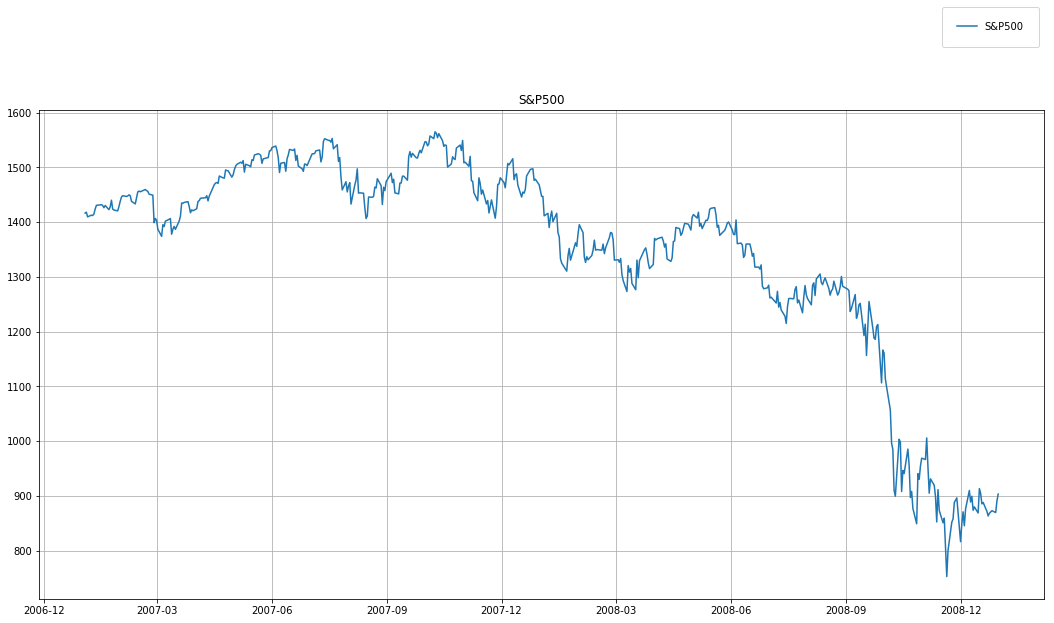

In [17]:
data_buf = plot_bagger(dataFrame, 200701, 200812)#dataFrame.set_index("caldt").ix[20060103:20080530]
x = data_buf.Date
y = data_buf.spindx

plt.figure(figsize=(18, 9))
plt.title('S&P500')
plt.plot(x, y, label = "S&P500")
plt.grid()
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), borderpad=1.5, labelspacing=1.5)
plt.show()


In [18]:
len(data_buf.caldt)

504

In [19]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [20]:
# fix random seed for reproducibility
# numpy.random.seed(7)

In [21]:
# load the dataset
#dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataframe = data_buf
#dataset = dataframe.values
dataset = dataframe["spindx"].values
#dataset = dataset.astype('float32')
dataset = dataset.reshape(len(dataset),1)

In [22]:
dataset[:10]

array([[ 1416.6 ],
       [ 1418.34],
       [ 1409.71],
       [ 1412.84],
       [ 1412.11],
       [ 1414.85],
       [ 1423.82],
       [ 1430.73],
       [ 1431.9 ],
       [ 1430.62]])

In [23]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [24]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

403 101


In [25]:
#len(dataset)

In [26]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [27]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [28]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [29]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

t = arrow.now()
model.fit(trainX, trainY, epochs = 50, batch_size=1, verbose=2)
print(arrow.now() - t)

Epoch 1/50
3s - loss: 0.2434
Epoch 2/50
2s - loss: 0.0067
Epoch 3/50
2s - loss: 0.0058
Epoch 4/50
3s - loss: 0.0054
Epoch 5/50
2s - loss: 0.0050
Epoch 6/50
2s - loss: 0.0044
Epoch 7/50
2s - loss: 0.0040
Epoch 8/50
2s - loss: 0.0034
Epoch 9/50
2s - loss: 0.0029
Epoch 10/50
2s - loss: 0.0024
Epoch 11/50
2s - loss: 0.0019
Epoch 12/50
2s - loss: 0.0015
Epoch 13/50
3s - loss: 0.0012
Epoch 14/50
2s - loss: 9.0494e-04
Epoch 15/50
2s - loss: 7.0003e-04
Epoch 16/50
2s - loss: 5.7331e-04
Epoch 17/50
2s - loss: 4.8202e-04
Epoch 18/50
2s - loss: 4.5591e-04
Epoch 19/50
3s - loss: 4.4657e-04
Epoch 20/50
3s - loss: 4.5499e-04
Epoch 21/50
2s - loss: 4.3287e-04
Epoch 22/50
2s - loss: 4.3930e-04
Epoch 23/50
2s - loss: 4.1859e-04
Epoch 24/50
2s - loss: 4.3316e-04
Epoch 25/50
2s - loss: 4.4829e-04
Epoch 26/50
2s - loss: 4.3394e-04
Epoch 27/50
2s - loss: 4.4618e-04
Epoch 28/50
2s - loss: 4.0971e-04
Epoch 29/50
2s - loss: 4.2619e-04
Epoch 30/50
2s - loss: 4.2044e-04
Epoch 31/50
2s - loss: 4.3314e-04
Epoch 3

In [30]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 17.85 RMSE
Test Score: 46.02 RMSE


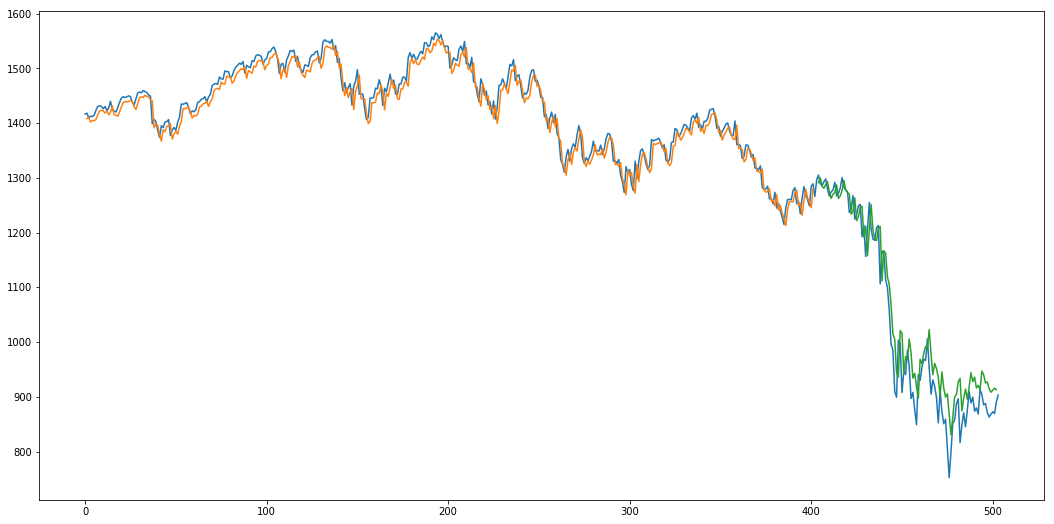

In [31]:
# shift train predictions for plotting
plt.figure(figsize=(18, 9))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

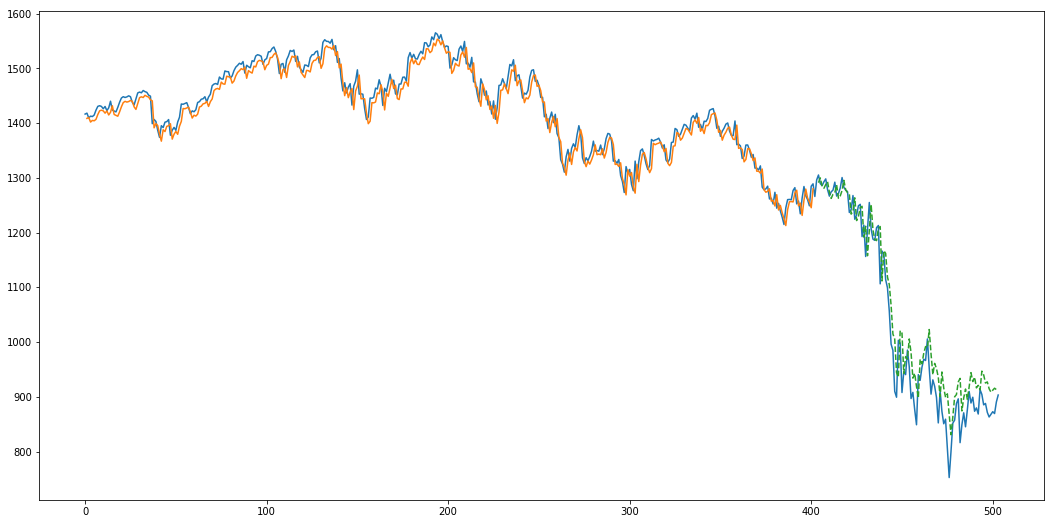

In [38]:
# shift train predictions for plotting
plt.figure(figsize=(18, 9))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#testPredictPlot = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset)[len(trainPredict)+(look_back*2):len(dataset)-1, :])
plt.plot(scaler.inverse_transform(dataset)[:, :])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot, "--")
plt.show()

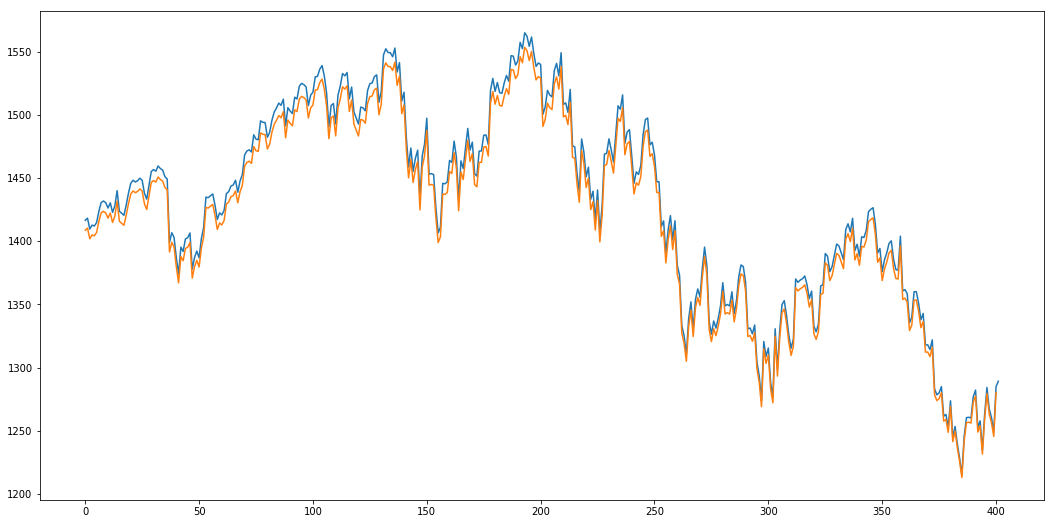

In [39]:

# shift train predictions for plotting
plt.figure(figsize=(18, 9))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
trainPredictPlot = trainPredict#[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)[:len(trainPredict)+look_back,:])
plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.show()